# Statistical and numerical methods in cosmology
# HW #4
### *Hernán E. Noriega B.*
### Instituto de Física, Universidad Nacional Autónoma de México

In [1]:
import numpy as np
import scipy
import math
import statistics
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## 1 power spectra, 5 random realizations

The max frequency (Nyquist) $k_{max}$ and the $k_{min}$ are given by,  
 
 $$k_{max}={\pi n}/{r_{max}} \quad \& \quad  k_{min} = 2\pi/r_{max}$$
 
 where: $n = 10000$ are the total points and  $r_{max} = 10$ is the max distance in real space 

In [2]:
#-Create a 1D real space array: between 0 and 10 with 10000 values

r_max = 10 #max value
n = 10000 #total points (elements)
r_arr = np.linspace(0,r_max,n) #r_arr: 1D real space array
step = r_max/n #step in the real space array

#-Get the corresponding frequencies

m = int(n/2) 
k = np.fft.fftshift(np.fft.fftfreq(n, d = step)*2*np.pi) #k: frequencies organized
k_pos = np.flip(np.abs(k[0:m])) #k_pos: k>0, from k_min to k_max

#-Create a Power spectrum

eps = 0.1 #eps: epsilon (given at HW4)

def P(k):
    return (k + eps)**(-2)

Remember, 

$${ \delta  }_{ k }=\left| { \delta  }_{ k } \right| { e }^{ i{ \phi  }_{ k } },\quad { \delta  }_{ k }^{ * }=\left| { \delta  }_{ k } \right| { e }^{ -i{ \phi  }_{ k } }$$

where,

$$\left| { \delta  }_{ k } \right| \sim  \mathcal{N}(0,\sigma^{2}=P(k)), \quad  { \phi  }_{ k }\sim \mathcal{U}([0,2\pi])$$

Reality cond. $$\delta_{-k}={ \delta  }_{ k }^{ * }$$

In [3]:
#-Generate five random realizations of the Fourier coefficients (the field is real)

#np.random.randn: standard normal distribution ->> mod_deltak (modulus)
#np.random.rand: uniform distribution ->> phi_k (phase)

rl = 5 #rl: realizations 

std = np.sqrt(P(k_pos)) #std: standard deviation, for k>0, from k_min to k_max
mod_delta_k = std * np.random.randn(rl,std.size) #modulus for k>0, from k_min to k_max
phi_k = 2 * np.pi * np.random.rand(rl,std.size) #phase for k>0, from k_min to k_max
delta_k = mod_delta_k * np.exp(1j * phi_k) #delta_k for k>0, from k_min to k_max


delta_k_max = np.zeros((rl, 1), dtype='complex') #for k=k_max
delta_k_pos = np.zeros((rl, m-1), dtype='complex') #for k>0, excluding k_max
delta_k_neg = np.zeros((rl, m-1), dtype='complex') #for k<0
delta_k_0 = np.zeros((rl, 1), dtype='complex') #for k=0

for ii in range(rl):
    delta_k_max[ii] = delta_k[ii][m-1] #we only take the values for k=k_max 
    delta_k_pos[ii] = delta_k[ii][:m-1] #we take k>0, excluding k_max
    delta_k_neg[ii] = np.flip(np.conj(delta_k_pos[ii])) #reality condition
    delta_k_0[ii] = 0 #we set delta_k(0) = 0 

#we put all results together, the order matters 
delta_k = np.concatenate((delta_k_0,delta_k_neg,delta_k_max,delta_k_pos),axis=1)

#-Do the inverse Fourier transform of the 5 realizations 
delta_r = np.fft.ifft(delta_k) #the order of delta_k matters

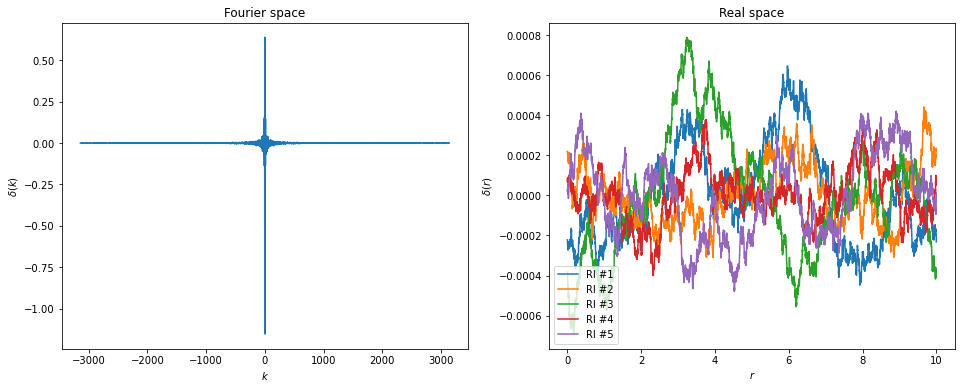

In [4]:
# -Plot the 5 realizations

fig, axs = plt.subplots(1,2,figsize=(16,6))

axs[0].plot(k, delta_k[0].real)
axs[0].set_xlabel(r'$k$')
axs[0].set_ylabel(r'$\delta(k)$')
axs[0].set_title(r'Fourier space')
    
for i in range(rl):
    axs[1].plot(r_arr[0::2], delta_r[i][0::2].real, label = f'Rl #{i+1}')
    axs[1].set_title(r'Real space')
    axs[1].set_xlabel(r'$r$')
    axs[1].set_ylabel(r'$\delta (r)$')
    axs[1].legend(loc='lower left')
#Rl: realization

plt.show()

Are they different? Do they look generating from a similar random process?

They are different, there are not exactly the same. At first instance, they do not look generating from a similar random process, nevertheless, we expect to have a similar distribution over a large number of realizations because in this exercise the variance was the same for all the realizations, i.e, the probability distribution was the same $\left| { \delta  }_{ k } \right| \sim  \mathcal{N}(0,\sigma^{2}=P(k)), \quad  { \phi  }_{ k }\sim \mathcal{U}([0,2\pi])$




## 3 power spectra, 1 random realizations

In [5]:
#-Create a 1D real space array: between 0 and 10 with 1000 values

r_max = 10 #max value
n = 1000 #total points (elements)
r_arr = np.linspace(0,r_max,n) #r_arr: 1D real space array
step = r_max/n #step in the real space array

#-Get the corresponding frequencies

m = int(n/2) 
k = np.fft.fftshift(np.fft.fftfreq(n, d = step)*2*np.pi) #k: frequencies organized
k_pos = np.flip(np.abs(k[0:m])) #k_pos: k>0, from k_min to k_max

#-Create a Power spectrum

eps = 0.001 #eps: epsilon (given at HW4)

def P(k,n):
    return (k + eps)**(-n)

#we define each of the Power spectrum of HW#4
P2_k = P(k_pos,2)
P3_k = P(k_pos,3)
P4_k = P(k_pos,4)

#-Generate only one random realization (one for each Power spectrum)

#np.random.randn: standard normal distribution ->> mod_deltak (modulus)
#np.random.rand: uniform distribution ->> phi_k (phase)

#std: standard deviations (for k>0, from k_min to k_max)
std2 = np.sqrt(P2_k)
std3 = np.sqrt(P3_k)     
std4 = np.sqrt(P4_k)
#one random realization 
randn = np.random.randn(std2.size) 
rand = np.random.rand(std2.size) 
#modulus: (for k>0, from k_min to k_maxL)
mod_delta_k2 = std2 * randn 
mod_delta_k3 = std3 * randn
mod_delta_k4 = std4 * randn
#phases: (for k>0, from k_min to k_max)
phi_k2 = 2 * np.pi * rand 
phi_k3 = 2 * np.pi * rand 
phi_k4 = 2 * np.pi * rand 
#delta_k: (for k>0, from k_min to k_max)
delta_k2 = mod_delta_k2 * np.exp(1j * phi_k2) 
delta_k3 = mod_delta_k3 * np.exp(1j * phi_k3)
delta_k4 = mod_delta_k4 * np.exp(1j * phi_k4) 
#delta_k_max: (only take the value for k=k_max)
delta_k2_max = delta_k2[m-1]
delta_k3_max = delta_k3[m-1]
delta_k4_max = delta_k4[m-1]
#delta_k_pos: (we take k>0, excluding k_max)
delta_k2_pos = delta_k2[:m-1] 
delta_k3_pos = delta_k3[:m-1]
delta_k4_pos = delta_k4[:m-1] 
#delta_k_neg: (reality condition)
delta_k2_neg = np.flip(np.conj(delta_k2_pos))
delta_k3_neg = np.flip(np.conj(delta_k3_pos))
delta_k4_neg = np.flip(np.conj(delta_k4_pos))
#delta_k_0: (we set delta_k(0) = 0 )
delta_k2_0 = delta_k3_0 = delta_k4_0 = 0
#we put all results together, the order matters 
delta_k2 = np.concatenate((delta_k2_0,delta_k2_neg,delta_k2_max,delta_k2_pos),axis=None)
delta_k3 = np.concatenate((delta_k3_0,delta_k3_neg,delta_k3_max,delta_k3_pos),axis=None)
delta_k4 = np.concatenate((delta_k4_0,delta_k4_neg,delta_k4_max,delta_k4_pos),axis=None)

#-Do the inverse Fourier transform of the 3 realizations 
delta_r2 = np.fft.ifft(delta_k2) 
delta_r3 = np.fft.ifft(delta_k3) 
delta_r4 = np.fft.ifft(delta_k4) 

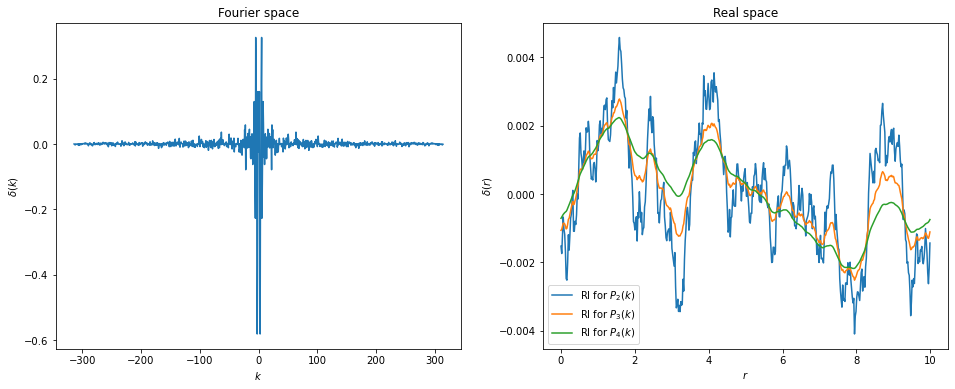

In [6]:
# -Plot the 3 realizations

fig, axs = plt.subplots(1,2,figsize=(16,6))

axs[0].plot(k, delta_k2.real)
axs[0].set_xlabel(r'$k$')
axs[0].set_ylabel(r'$\delta(k)$')
axs[0].set_title(r'Fourier space')

axs[1].plot(r_arr[0::2], delta_r2[0::2].real, label = 'Rl for $P_{2}(k)$')
axs[1].plot(r_arr[0::2], delta_r3[0::2].real, label = 'Rl for $P_{3}(k)$')
axs[1].plot(r_arr[0::2], delta_r4[0::2].real, label = 'Rl for $P_{4}(k)$')

axs[1].set_title(r'Real space')
axs[1].set_xlabel(r'$r$')
axs[1].set_ylabel(r'$\delta (r)$')
axs[1].legend(loc='lower left')
#Rl: realization

plt.show()

What can you conclude?

The figure above is the result of one realization for each power spectrum, $P_2(k) = (k+\epsilon)^{-2}, P_3(k) = (k+\epsilon)^{-3}$ and $P_4(k) = (k+\epsilon)^{-4}$. We can conclude that the realization give us the shape of $\delta(r)$, also its evident that as we increase the exponent value in the power spectrum there appear fewer details in the plot. Finally, another observation is that $P_2(k)>P_3(k)>P_4(k)$, so the width of Gaussian distributions follow the same order, that is, the Gaussian with the bigger width is the corresponding to $P_2(k)$ and so on.. that happens in the k-space, in the real space we hope the opposite, the effect generates by $P_2(k)>P_3(k)>P_4(k)$ can be observed in the figure above.